In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV
import statsmodels.api as sm
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [9]:
dataset = pd.read_csv('Admission_Prediction.csv')
dataset.shape

(500, 9)

In [12]:
ProfileReport(dataset).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

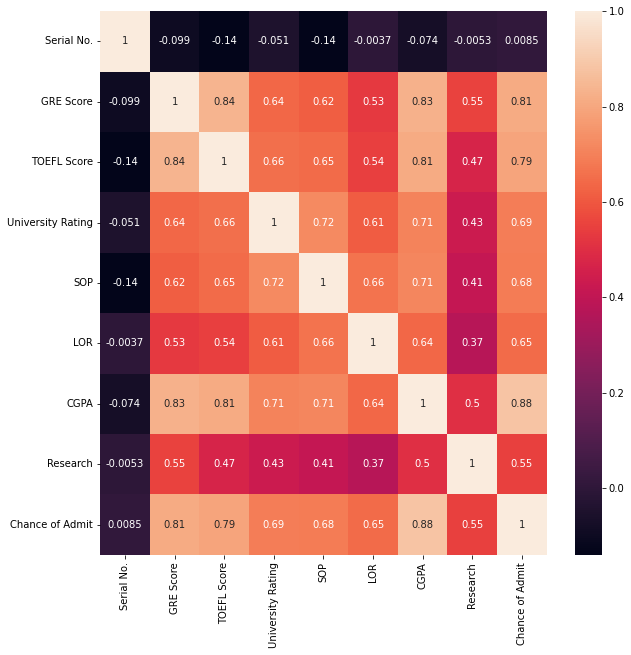

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

###### Missing value handling

In [22]:
dataset.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [29]:
dataset['GRE Score'] = dataset['GRE Score'].fillna(dataset['GRE Score'].mean())

In [30]:
dataset['TOEFL Score'] = dataset['TOEFL Score'].fillna(dataset['TOEFL Score'].mean())

In [31]:
dataset['University Rating'] = dataset['University Rating'].fillna(dataset['University Rating'].mean())

In [33]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128802,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [36]:
dataset.drop('Serial No.',axis = 1,inplace=True)

###### X and Y split

In [45]:
y = dataset['Chance of Admit']
X =  dataset.drop(['Chance of Admit'],axis = 1)

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    float64
 1   TOEFL Score        500 non-null    float64
 2   University Rating  500 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


###### Standardization

In [49]:
scaler = StandardScaler()

In [51]:
standardScaledX = scaler.fit_transform(X)

In [52]:
standardScaledX

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [59]:
scaledDataset = pd.DataFrame(standardScaledX,columns=dataset.columns[:-1])

In [61]:
scaledDataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,4.350520e-15,9.419132e-16,5.608847e-16,2.926548e-16,-1.332268e-17,3.091971e-15,-2.202682e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.394225e+00,-2.512331e+00,-1.881441e+00,-2.397950e+00,-2.686789e+00,-2.940115e+00,-1.128152e+00
25%,-6.814090e-01,-6.927310e-01,-9.946589e-01,-8.828175e-01,-5.235128e-01,-7.430227e-01,-1.128152e+00
50%,5.124333e-15,-3.105811e-02,-1.078766e-01,1.272712e-01,1.730621e-02,-2.720919e-02,8.864053e-01
75%,6.708143e-01,7.960330e-01,7.789057e-01,6.323155e-01,5.581253e-01,7.672196e-01,8.864053e-01
max,2.113186e+00,2.119379e+00,1.665688e+00,1.642404e+00,1.639763e+00,2.223672e+00,8.864053e-01


In [63]:
ProfileReport(scaledDataset).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

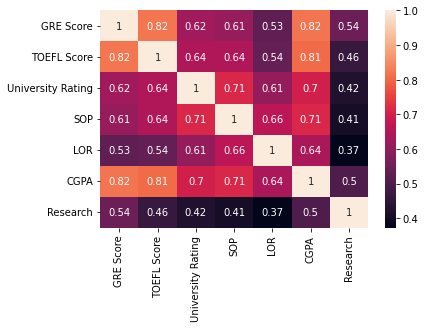

In [65]:
sns.heatmap(scaledDataset.corr(),annot=True)

###### variance inflation factor

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
vif = pd.DataFrame()
vif['features'] = scaledDataset.columns

In [74]:
vif['vif'] = [variance_inflation_factor(scaledDataset,i) for i in range(scaledDataset.shape[1])]

In [75]:
vif

,features,vif
0,GRE Score,4.153268
1,TOEFL Score,3.792866
2,University Rating,2.508768
3,SOP,2.775750
4,LOR,2.037308
5,CGPA,4.651670
6,Research,1.459311


In [ ]:
# there are no values greater than 10
# If there are more than 10, then we need to remove the features

###### Splitting the Dataset

In [77]:
XTrain,XTest,yTrain,yTest = train_test_split(scaledDataset,y,test_size=0.10,random_state=100)

In [78]:
print(XTrain.shape,XTest.shape,yTrain.shape,yTest.shape)

(450, 7) (50, 7) (450,) (50,)


###### Linear Regression

In [79]:
lr = LinearRegression()
lr.fit(XTrain,yTrain)

LinearRegression()

In [82]:
lr.coef_

array([ 0.01910105,  0.01654831,  0.00508326, -0.00047758,  0.01745071,
        0.07526256,  0.0127209 ])

In [83]:
lr.intercept_

0.7204110140569641

In [91]:
import pickle

In [92]:
pickle.dump(lr,open('admin_predictionmodel.pkl','wb'))

In [95]:
ls

 Volume in drive C is OS
 Volume Serial Number is BA91-9677

 Directory of C:\Users\KARTHIKRAGHAVAN\Desktop\Ineuron\Notebooks\ML Hands on\Linear Regression

27-07-2022  11:12    <DIR>          .
27-07-2022  00:40    <DIR>          ..
27-07-2022  10:16    <DIR>          .ipynb_checkpoints
27-07-2022  11:11               703 admin_predictionmodel.pkl
26-07-2022  11:31            16,085 Admission_Prediction.csv
26-07-2022  11:31             4,756 Advertising.csv
27-07-2022  11:12           140,653 Linear Regression using Admission dataset.ipynb
27-07-2022  10:26         2,069,048 Linear Regression using Advertising Dataset.ipynb
27-07-2022  09:36               545 lr.pkl
27-07-2022  00:39             2,425 Testing pickle file demo.ipynb
               7 File(s)      2,234,215 bytes
               3 Dir(s)  200,161,288,192 bytes free


In [98]:
X.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1


In [104]:
lr.predict(scaler.transform([[337,118,4,4.5,4.5,9.65,1]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.95280308])

In [105]:
lr.score(XTest,yTest)

0.845560194064721

In [108]:
def AdjustedRSquared(X,y,model):
    r2 = model.score(X,y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1-r2)*(n-1) / (n-p-1)
    return adjusted_r2

In [110]:
AdjustedRSquared(XTest,yTest,lr)

0.8198202264088412

###### Cross Validation

In [116]:
lassocv = LassoCV(alphas = None,cv = 50,max_iter=1000,normalize=True)

In [117]:
lassocv.fit(XTrain,yTrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=50, normalize=True)

In [118]:
lassocv.alpha_

2.5304685541530637e-05

###### Lasso Regression

In [120]:
lsmodel = Lasso(alpha=lassocv.alpha_)

In [121]:
lsmodel.fit(XTrain,yTrain)

Lasso(alpha=2.5304685541530637e-05)

In [122]:
lsmodel.score(XTest,yTest)

0.8457056329852929

In [123]:
lsmodel.predict(scaler.transform([[337,118,4,4.5,4.5,9.65,1]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([0.95275911])

###### Ridge Regression

In [124]:
rdcv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10,normalize=True)

In [126]:
rdcv.fit(XTrain,yTrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

RidgeCV(alphas=array([9.958081  , 6.55625156, 8.93820644, 0.81327026, 9.33901322,
       9.24700424, 8.36900447, 7.39846033, 3.18380323, 8.02539988,
       2.48425464, 0.19183151, 1.11506652, 9.56185136, 8.61326667,
       8.32570944, 6.05002625, 8.06473527, 8.47312407, 1.51694049,
       7.25937509, 0.54945403, 4.44271016, 3.90515932, 0.27670849,
       5.23505944, 5.26504521, 9.1333191 , 9.80829063, 1.96006511,
       3.6376558 , 2.43727372, 3.7779881 , 3.76745171, 7.12678452,
       6.90531435, 7.3691374 , 8.28274047, 8.45380164, 1.69524308,
       5.73220242, 9.52372442, 5.74372123, 8.05998433, 7.07365749,
       8.05444875, 8.99031893, 5.45075817, 0.95626943, 2.56541215]),
        cv=10, normalize=True)

In [127]:
rdcv.alpha_

0.19183150965115803

In [128]:
rdmodel = Ridge(alpha=rdcv.alpha_)

In [129]:
rdmodel.fit(XTrain,yTrain)

Ridge(alpha=0.19183150965115803)

In [131]:
rdmodel.score(XTest,yTest)

0.8456386740278835

###### Elastic Net

In [132]:
elcv = ElasticNetCV(alphas=None,cv = 10)

In [133]:
elcv.fit(XTrain,yTrain)

ElasticNetCV(cv=10)

In [134]:
elcv.alpha_

0.001860632420865411

In [137]:
elmodel = ElasticNet(alpha=elcv.alpha_,l1_ratio = elcv.l1_ratio_)

In [138]:
elmodel.fit(XTrain,yTrain)

ElasticNet(alpha=0.001860632420865411)

In [139]:
elmodel.score(XTest,yTest)

0.8464012025641322